<a href="https://colab.research.google.com/github/olumide-olaiya/breastcancer_ml/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Required Libraries

In [29]:

#General libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# libraries for encoding, data splitting and transformations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# libraries for models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC


# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

Loadind of Data 

Mount the data on drive to collab

In [30]:
# load data
# to mount google drive to collab
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [31]:
#mydata =  pd.read_csv('/drive/My Drive/ML MODELS/BREAST CANCER/breastcancerdata.csv')
# drop the ID column, it's not needed
#mydata = mydata.drop(["id"], axis=1)
#mydata.head(5)

In [32]:
url = ("https://raw.githubusercontent.com/olumide-olaiya/breastcancer_ml/main/breastcancerdata.csv")

mydata =  pd.read_csv(url)
# drop the ID column, it's not needed
mydata = mydata.drop(["id"], axis=1)
mydata.head(5)

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
#information about the data
mydata.shape
mydata.info()
mydata.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Index(['diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [34]:
mydata.describe()

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Check for Null Values 

In [35]:
mydata.isna().sum()

diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

EXPLANATORY DATA ANALYTICS (EDA)

In [36]:
#Correlation
mydata.corr()

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Radius_mean,1.000000,0.326716,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Texture_mean,0.326716,1.000000,0.332231,0.324149,-0.024737,0.235863,0.302324,0.294307,0.071390,-0.077844,...,0.355463,0.911275,0.360485,0.346576,0.076875,0.277075,0.300731,0.297040,0.104590,0.119644
perimeter_mean,0.997855,0.332231,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.324149,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.024737,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.235863,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302324,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.294307,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071390,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.077844,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Text(0.5, 1.0, 'The Correlation Heatmap')

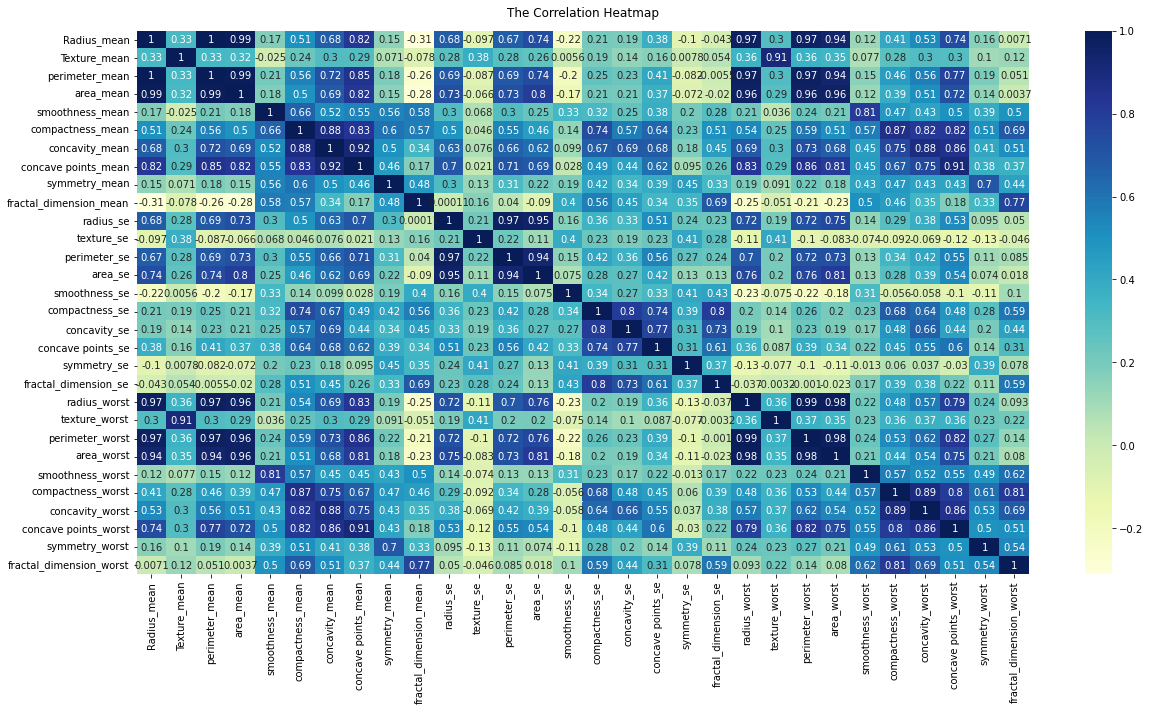

In [37]:
# visualizing the correlation values using heatmap for a clearer views
plt.figure (figsize=(20,10))
my_corr = mydata.corr()
my_heatmap= sns.heatmap(my_corr, cmap="YlGnBu", annot= True)
my_heatmap.set_title('The Correlation Heatmap',fontdict={'fontsize':12}, pad=14)

Check for the labels variable to see if it is reasonably balanced in terms of distribution

B    357
M    212
Name: diagnosis, dtype: int64


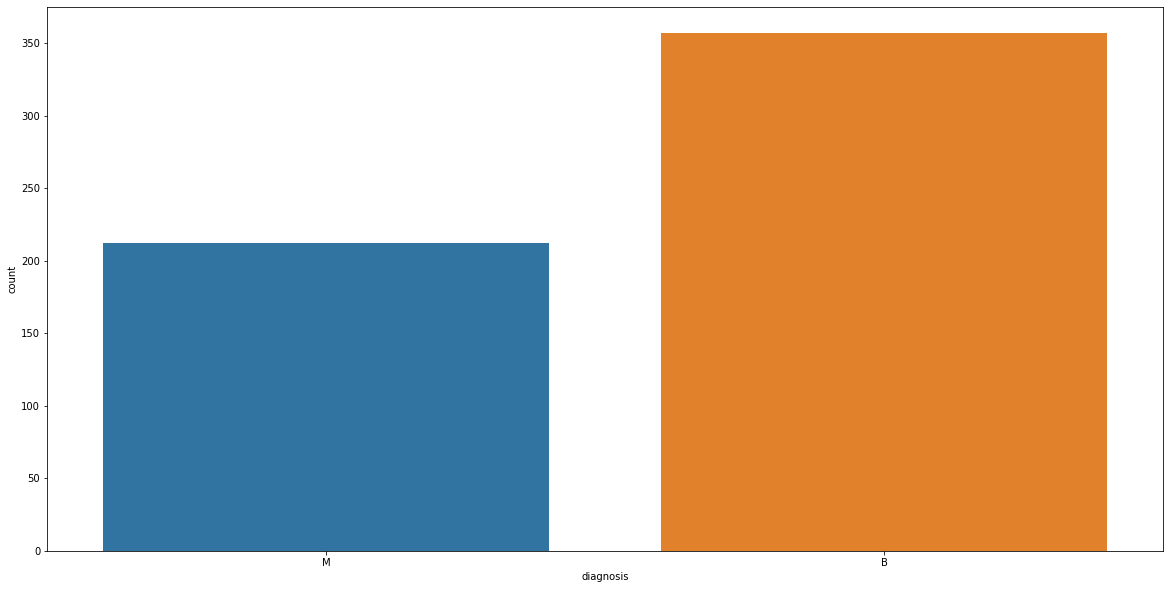

In [38]:
plt.figure (figsize=(20,10))
sns.countplot(x= mydata["diagnosis"])
print(mydata["diagnosis"].value_counts())


Distrubtion of each feature across the labels

In [39]:
# state explicitly the varirables (data type) for continuous type
cont_feat = [column for column in mydata.columns if mydata[column].dtype == 'float64']
print(cont_feat)

['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Plots for all the numeric independent variables

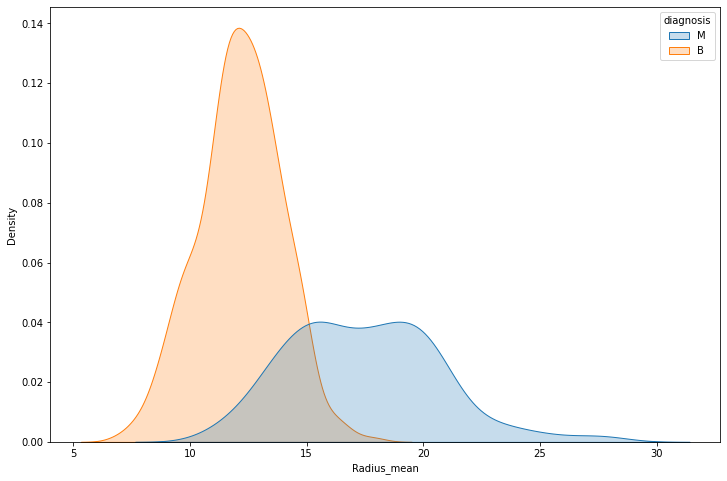

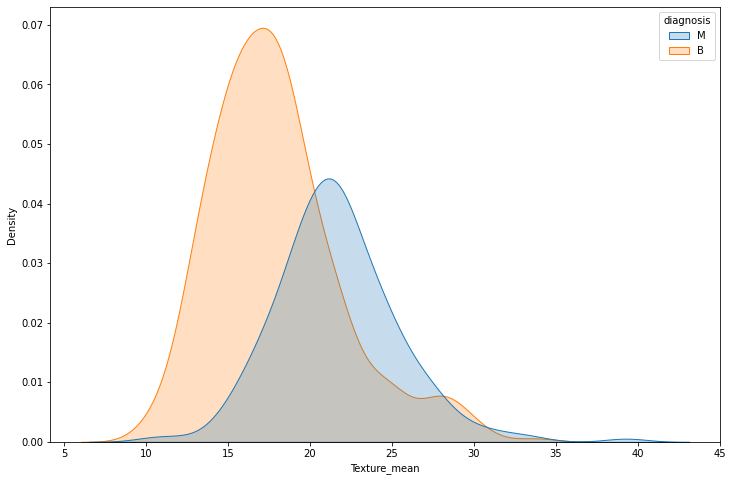

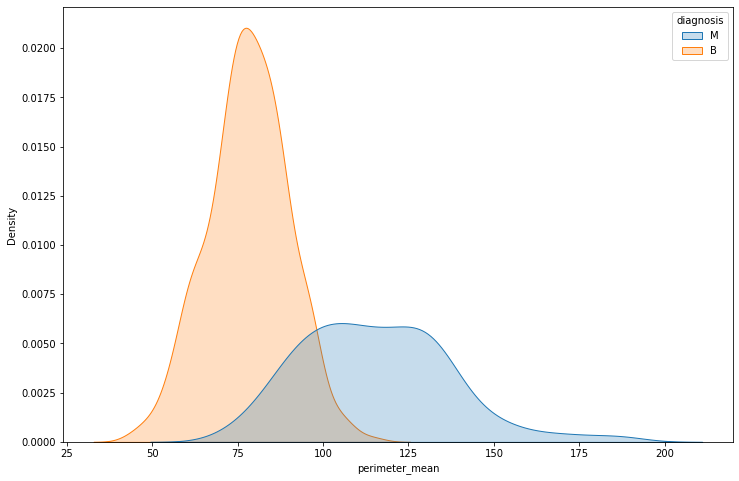

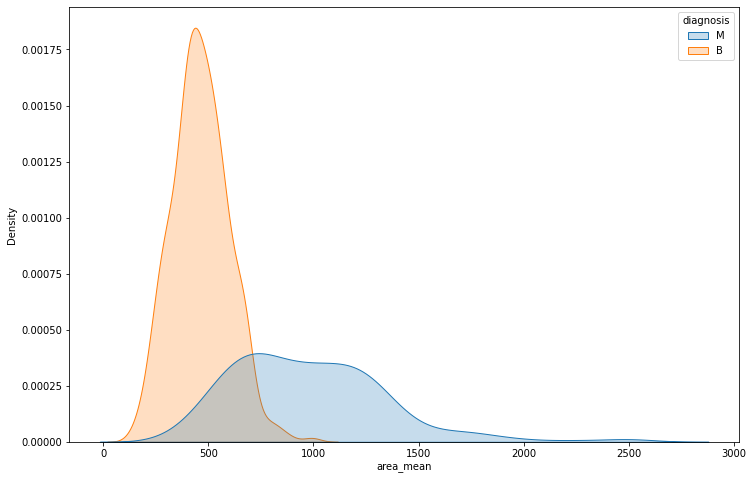

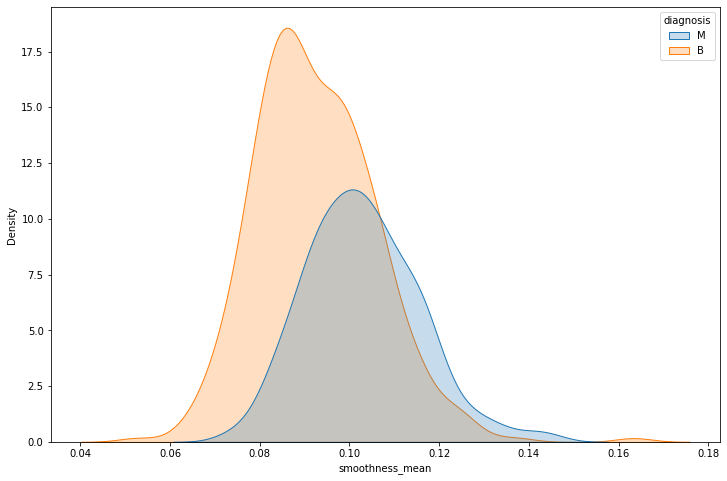

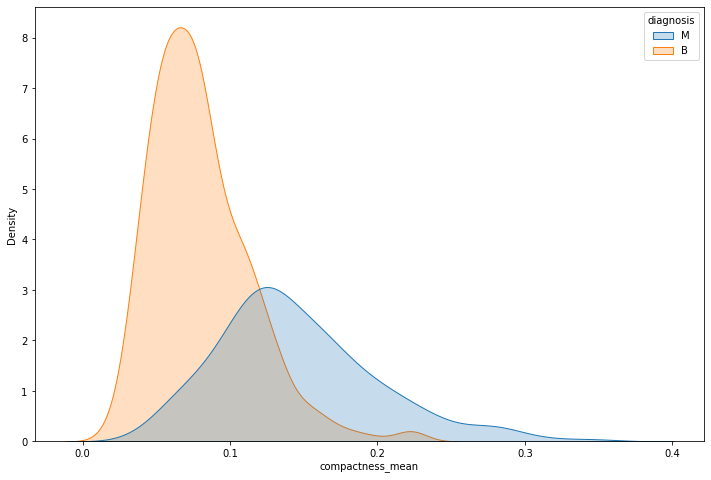

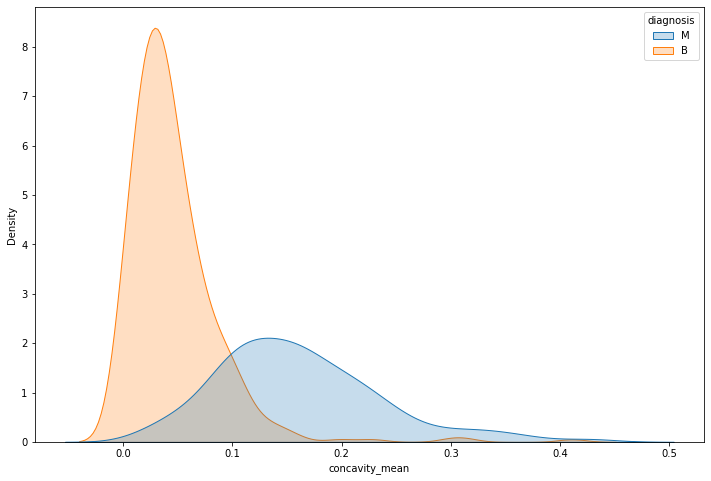

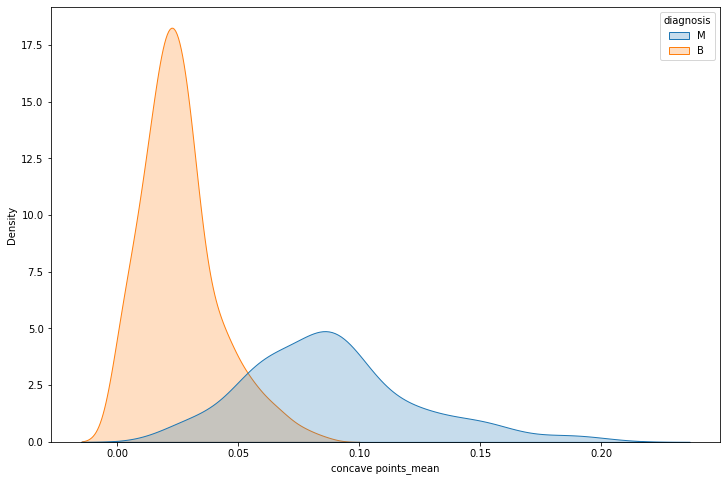

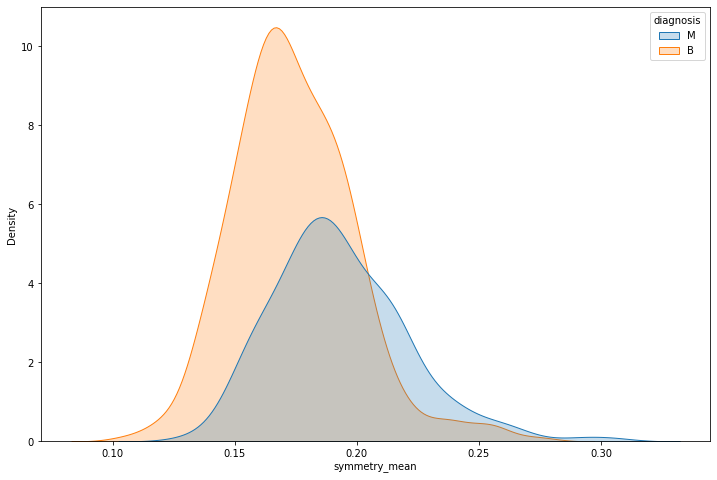

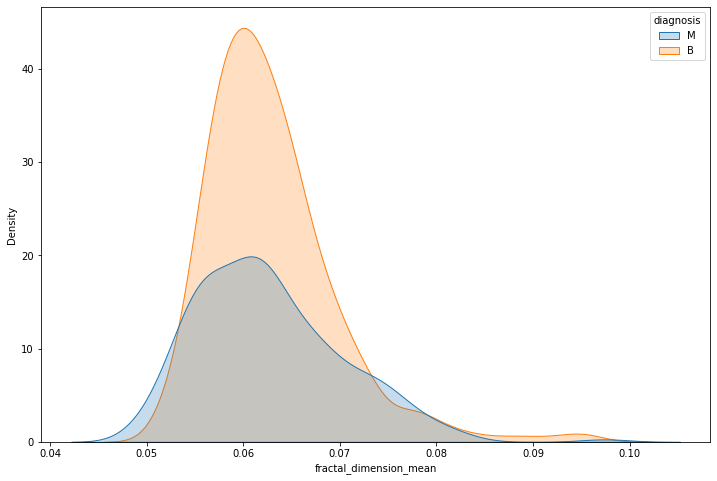

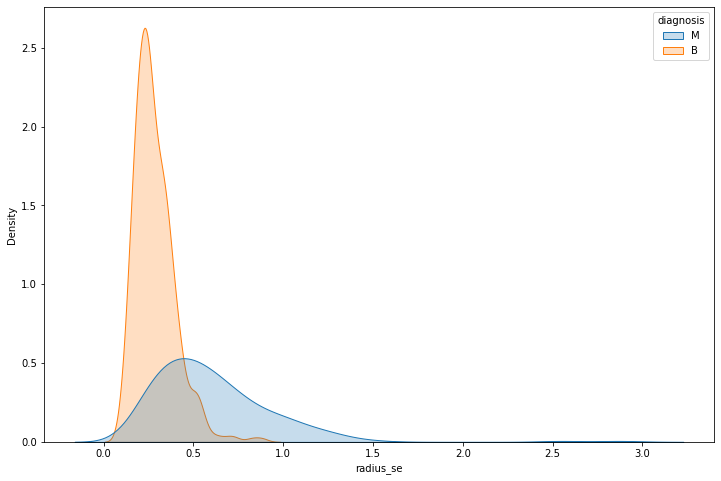

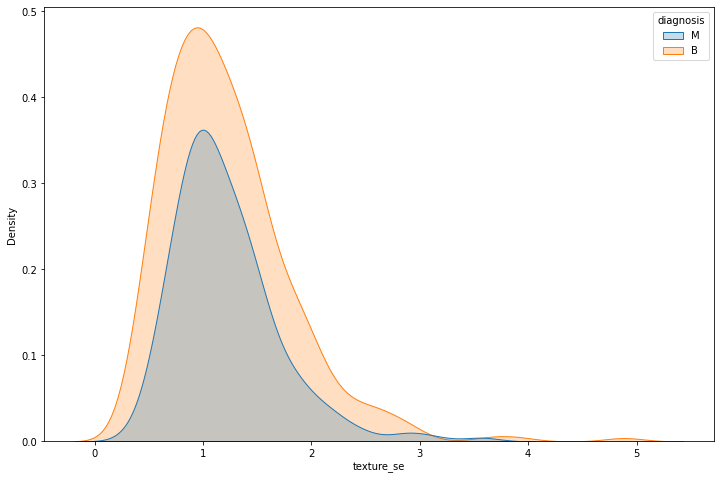

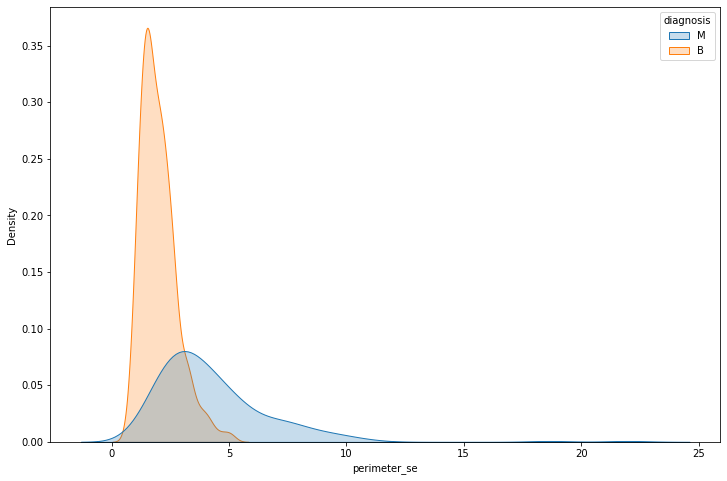

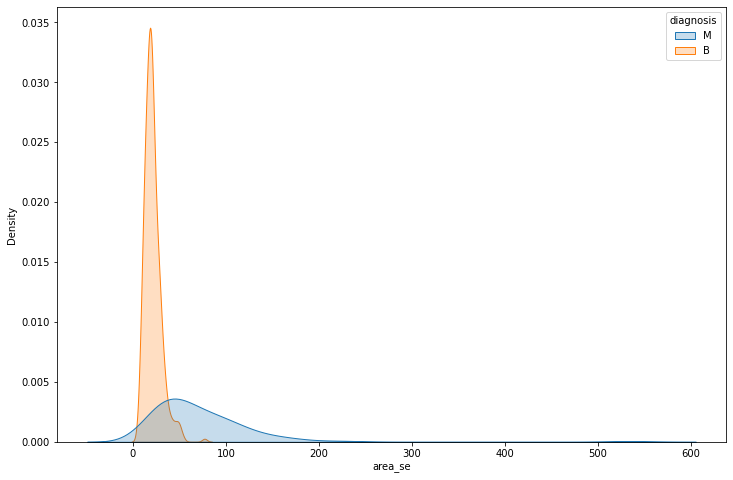

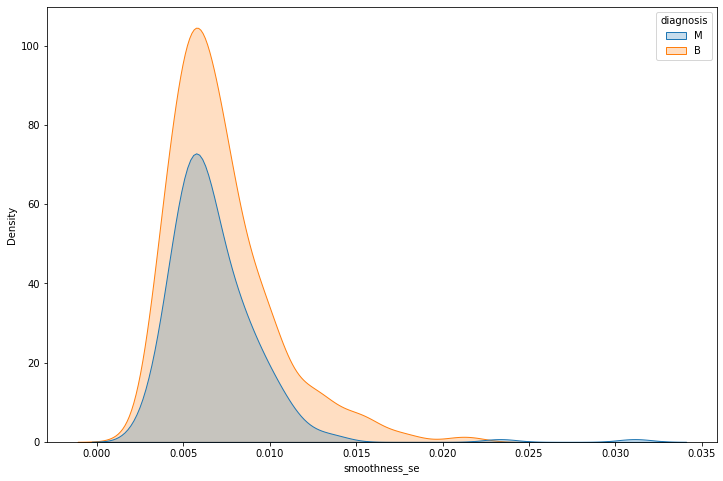

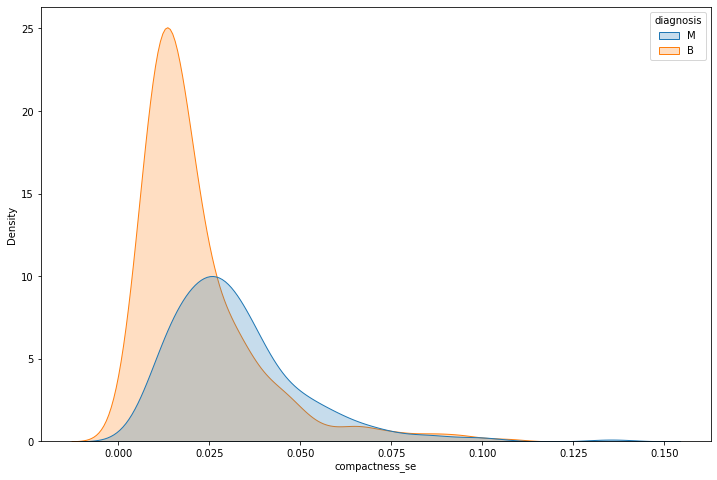

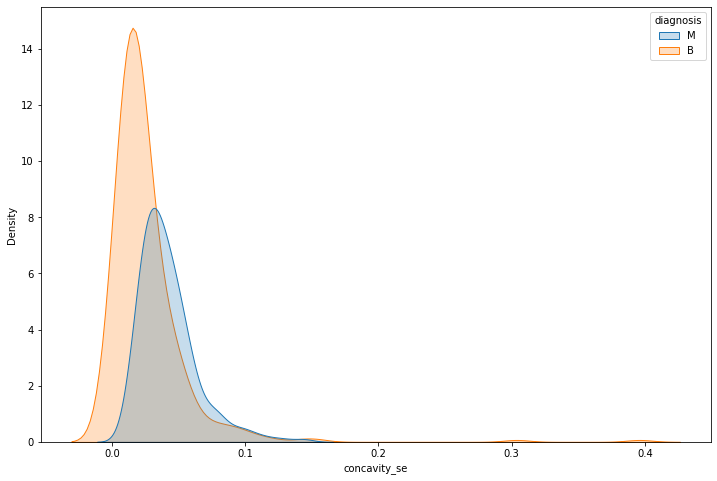

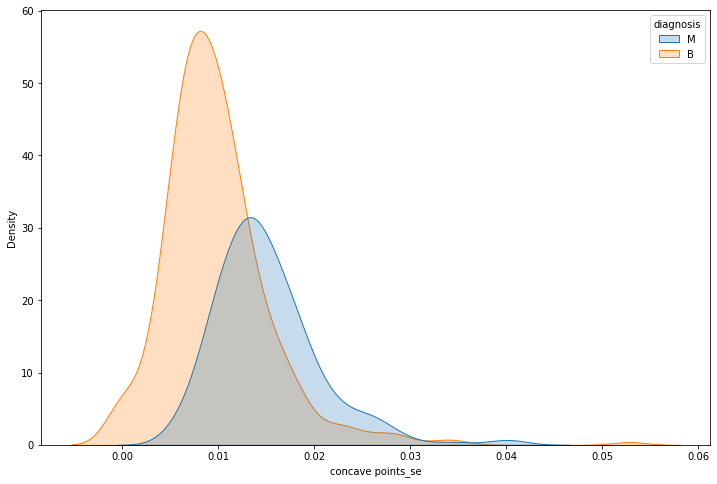

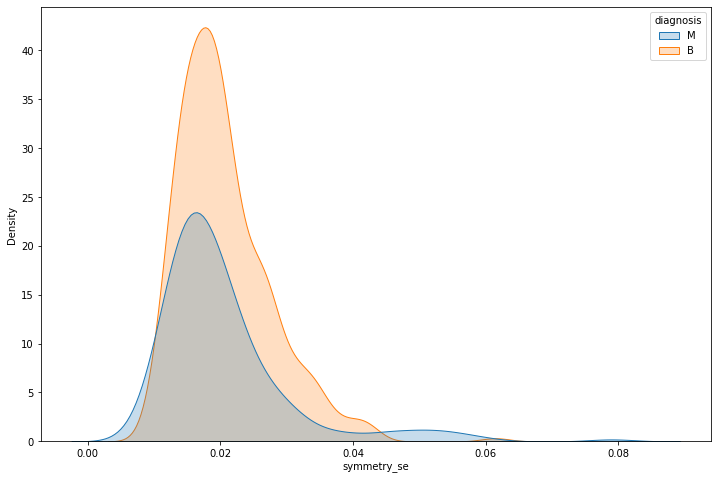

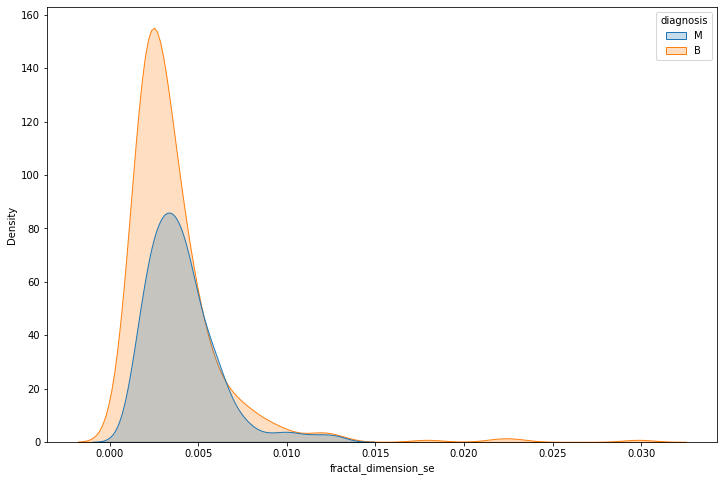

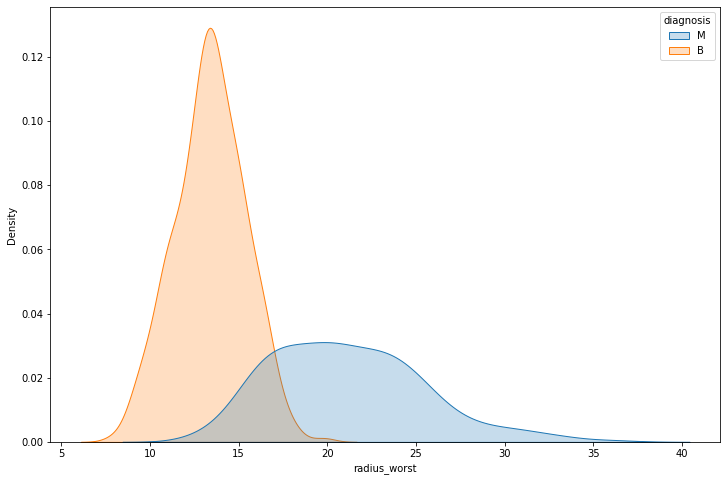

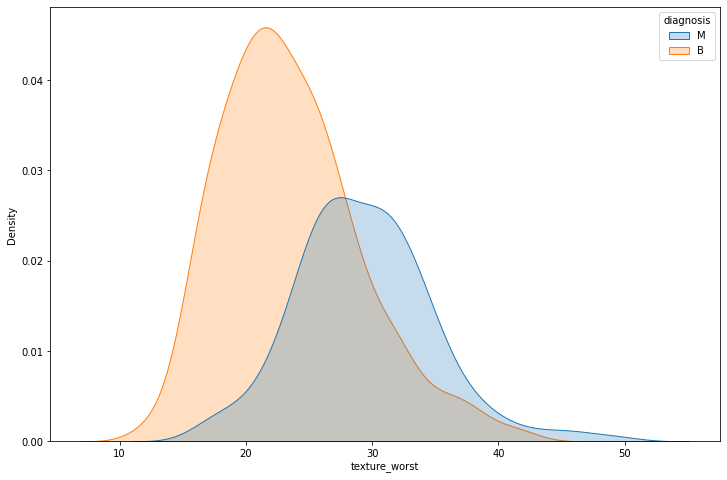

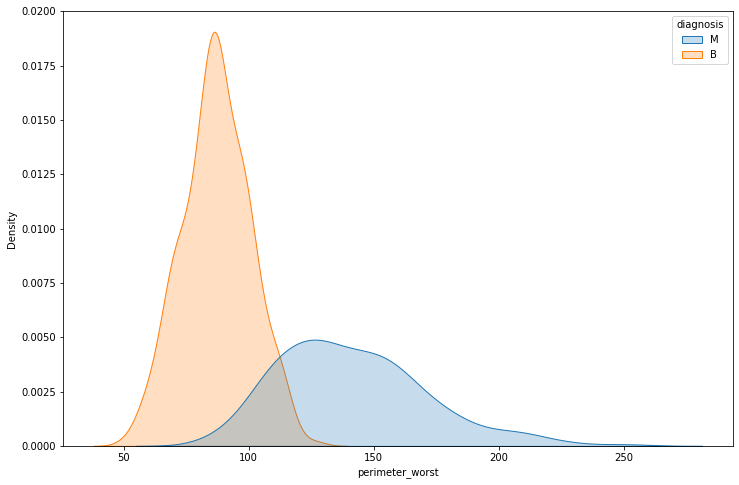

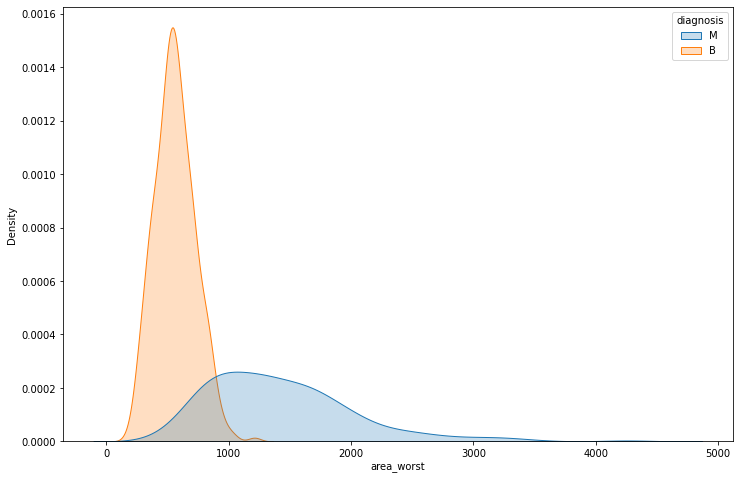

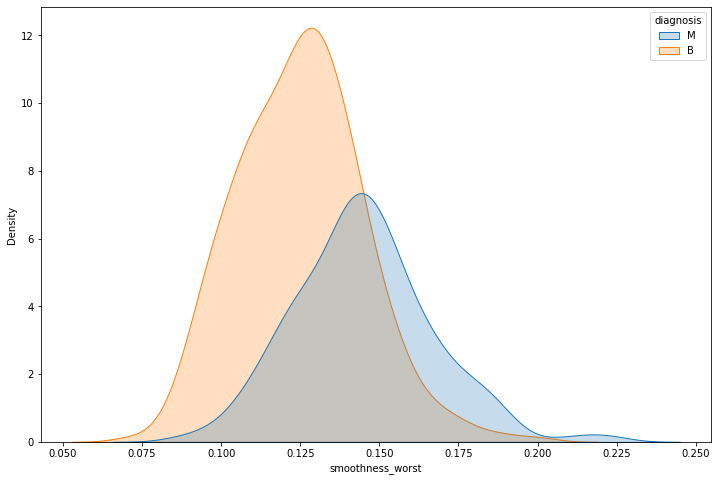

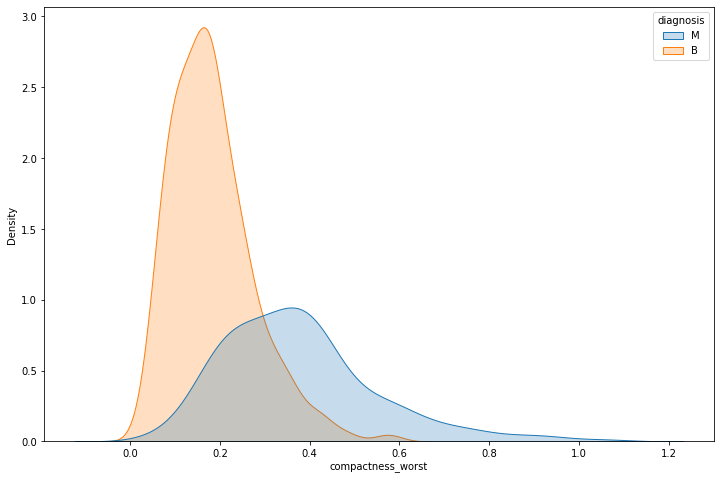

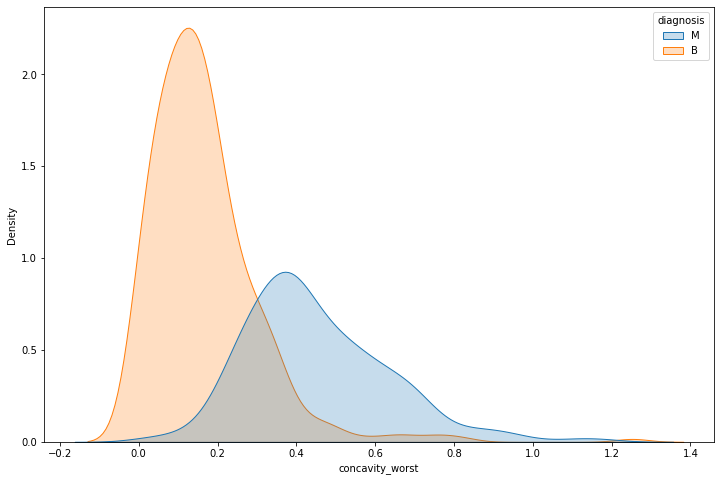

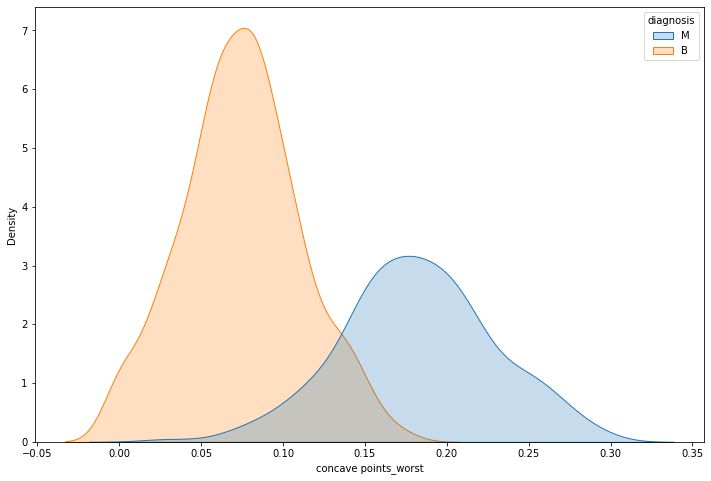

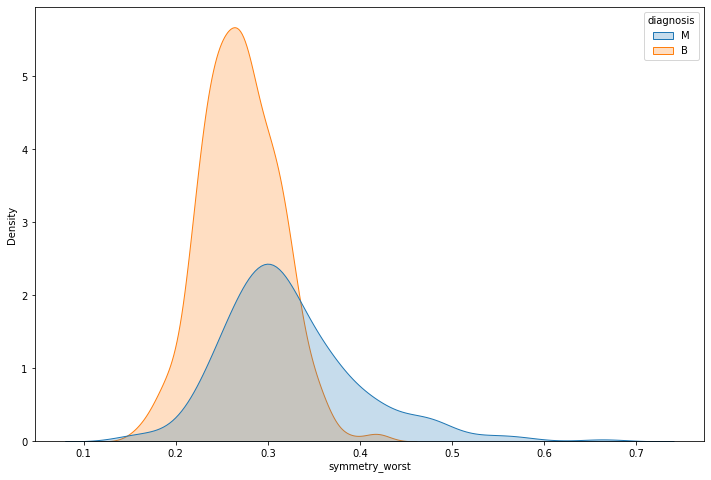

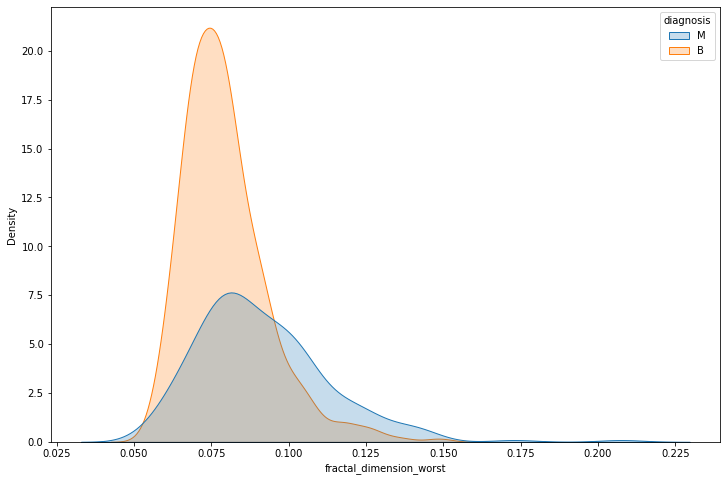

In [40]:
# iterative plots of each variable
for column in cont_feat:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=mydata, x=column, hue='diagnosis',  fill=True)
    plt.show()

Data Pre-processing

In [41]:
#Split data into test and train unit
X_train=mydata.drop(columns=["diagnosis"])
y_train=mydata["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [42]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (455, 30)
Test dataset shape (455,)


In [43]:
cont_feat = X_train.select_dtypes(exclude= 'object').columns
print(cont_feat)
print('*'*100)
cate_feat = X_train.select_dtypes(include='object').columns
print(cate_feat)

Index(['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
****************************************************************************************************
Index([], dtype='object')


Data cleaning, missing values handling, categorical variable encoding

In [44]:
cont_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])
print(cont_features)
print('*'*100)

cate_features =  Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(cate_features)

processing = ColumnTransformer([
    ('numeric', cont_features, cont_feat),
    ('categorical', cate_features, cate_feat)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture...
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImpute

Model and  Evaluation Metric Preparation

Dimensionality Reduction

In [45]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

Confusion Matrix

In [46]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
      # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

Classification Report

In [47]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

ROC Curve

In [48]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

Models Preparation

In [49]:
my_algorithms = [('KNN classifier', KNeighborsClassifier()), 
                 ('Random Forest calssifier', RandomForestClassifier()),
                 ('MLP', MLPClassifier()),
                 ('Support Vector Machine', SVC(probability=True))
                ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(my_algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

Model Evaluation

In [50]:
# accuracy Output
print(model_and_score)

{'KNN classifier': '96.04395604395604%', 'Random Forest calssifier': '100.0%', 'MLP': '96.04395604395604%', 'Support Vector Machine': '95.16483516483515%'}


KNN classifier


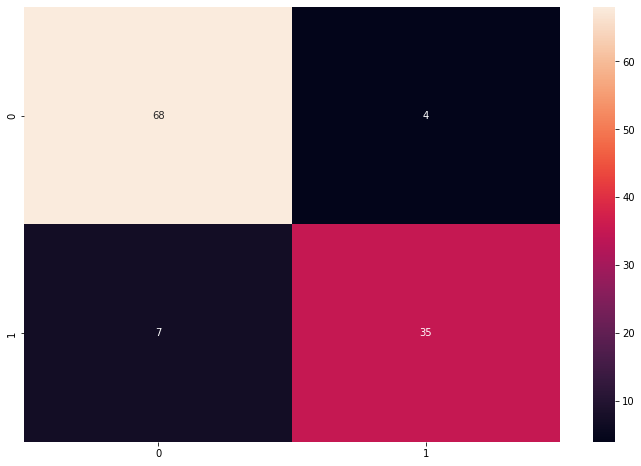

Random Forest calssifier


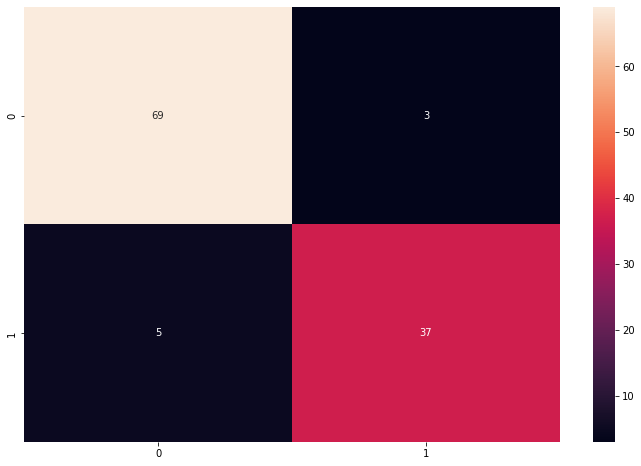

MLP


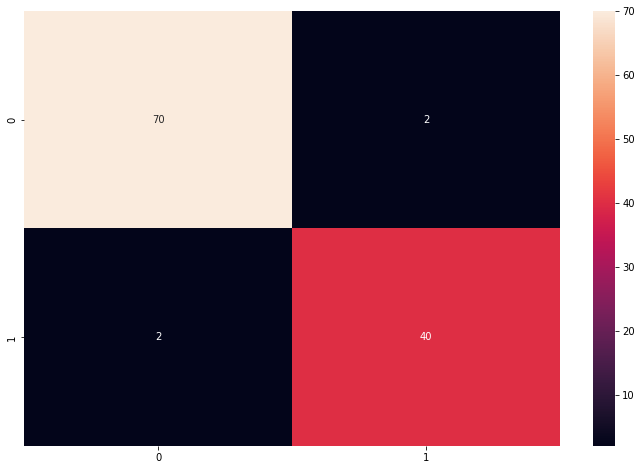

Support Vector Machine


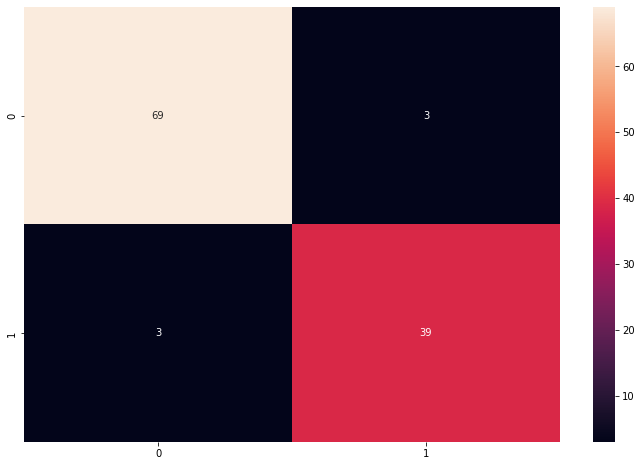

In [51]:
#Confusion Matrix Output
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [52]:
# F1-score,Precision and Recall Output
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

KNN classifier Report :
              precision    recall  f1-score   support

           B       0.91      0.94      0.93        72
           M       0.90      0.83      0.86        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



Random Forest calssifier Report :
              precision    recall  f1-score   support

           B       0.93      0.96      0.95        72
           M       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



MLP Report :
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        72
           M       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114

KNN classifier


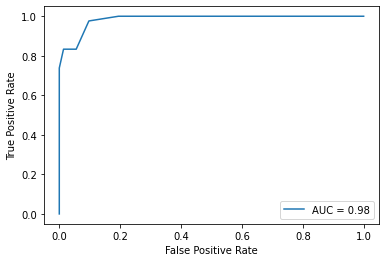

Random Forest calssifier


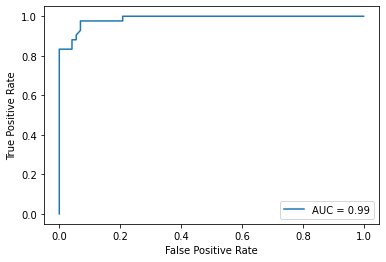

MLP


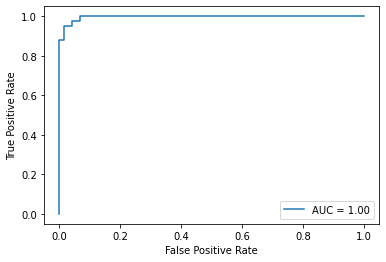

Support Vector Machine


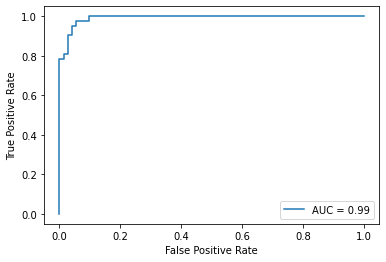

In [53]:
# ROC output
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1]) 